## <span style='color :Blue'>Research Question and Problem Formulation:</span>
<br>

<li>Examine through exploratory data analysis from given dataset how has the P2P lending and Crowd-Funding Sector developed 
    across APAC?</li>
    <br>
<li> What are the opportunities and challenges as demonstrated from the findings?</li>






In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.ExcelFile('APAC_DATA_TEST.xlsx')

In [4]:
df.sheet_names

['Mastercut']

In [5]:
df = df.parse('Mastercut')
#df.head()

## <span style='color :Blue'>Part 1 : Exploratory Data Analysis : Preprocessing </span>

<br>
## <span style='color :Blue'>Steps:</span>
<br>

<ol>
<li> Examine shape of data - observations vs features, rename col attributes to descriptive names</li>
    <br>
<li> Create data frames akin to relational data base tables : one to describe model type - as data type is categorical, one hot encoding is required</li>
    <br>
<li> Second, create statistical volume df similar to model type data frame</li>
    <br>
<li> Explore relation between model type, volume</li>
    <br>
<li> Link the results extracted to address some business questions.</li>    
</ol>


In [6]:
new_header = df.iloc[0]

In [7]:
new_header

PLATFORM                                  ResponseID
MODEL TYPE                                      P2PC
MODEL TYPE.1                                    P2PB
MODEL TYPE.2                                    P2PP
MODEL TYPE.3                                    BSCL
MODEL TYPE.4                                    BSBL
MODEL TYPE.5                                    BSPL
MODEL TYPE.6                         Invoice Trading
MODEL TYPE.7                                     ECF
MODEL TYPE.8                                    RECF
MODEL TYPE.9                                  REWARD
MODEL TYPE.10                               DONATION
MODEL TYPE.11                              REV SHARE
MODEL TYPE.12                              COM SHARE
MODEL TYPE.13                                    DBS
MODEL TYPE.14                             MINI BONDS
MODEL TYPE.15                                  OTHER
MODEL TYPE.16                             OTHER-TEXT
COUNTRY HQ                              HEAD Q

In [8]:
new_df = pd.DataFrame(df.values[1:], columns = new_header)

In [9]:
#new_df.shape() -no of variables versus no of observations

new_df.head()

,ResponseID,P2PC,P2PB,P2PP,BSCL,BSBL,BSPL,Invoice Trading,ECF,RECF,...,DONATION (USD),REV SHARE (USD),COM SHARE (USD),DBS (USD),MINI BONDS (USD),OTHER (USD),Regulatory Authorization:,Reg Perceptions,FEMALE FUNDRAISER RATE,FEMALE FUNDER RATE
0,R_qKR6FIw6cvbDEd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8179.46,NaN,NaN,NaN,NaN,NaN,My platform is authorized in my jurisdiction.,Excessive and too strict for my platform activ...,NaN,NaN
1,R_qKR6FIw6cvbDEd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2080.01,NaN,NaN,NaN,NaN,NaN,My platform is authorized in my jurisdiction.,Excessive and too strict for my platform activ...,NaN,NaN
2,R_qKR6FIw6cvbDEd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3289.5,NaN,NaN,NaN,NaN,NaN,My platform is authorized in my jurisdiction.,Excessive and too strict for my platform activ...,NaN,NaN
3,R_1rkVNIIYyBgLMMZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74359.5,NaN,NaN,NaN,NaN,NaN,My platform is not authorized but has interim ...,Adequate and appropriate for my platform activ...,0.5,NaN
4,R_1QiODUL7I45RHnv,NaN,P2P/Marketplace Business Lending,NaN,NaN,Balance Sheet Business Lending,NaN,Invoice Trading,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,My platform is authorized in my jurisdiction.,Excessive and too strict for my platform activ...,NaN,NaN


In [10]:
# rename columns 

new_df = new_df.rename(
    columns={
        'Invoice Trading': 'INVOICE_TRADING',
        'REV SHARE': 'REV_SHARE',
        'COM SHARE': 'COM_SHARE',
        'MINI BONDS': 'MINI_BONDS',
        'HEAD QUARTER': 'HEADQUARTERS',
        'OPERATING COUNTRY': 'OPERATING_CTRY',
        'COM SHARE': 'COM_SHARE',
        'REGION (CCAF)': 'REGION_CCAF_DEFINED',
        'REGION (WB)': 'REGION_WB_DEFINED',
        'SUB REGION': 'SUB_REGION',
        'P2PC (USD)': 'P2PC_VOL_USD',
        'P2PB (USD)': 'P2PB_VOL_USD',
        'P2PP (USD)': 'P2PP_VOL_USD',
        'BSCL (USD)': 'Bal_Sheet_Consumer_Lending_VOL_USD',
        'BSBL (USD)': 'Bal_Sheet_Business_Lending_VOL_USD',
        'BSPL (USD)': 'Bal_Sheet_Property_Lending_VOL_USD',
        'Invoice Trading (USD)': 'Invoice_Trading_VOL_USD',
        'ECF (USD)': 'Equity_Crowd_Funding_VOL_USD',
        'RECF (USD)': 'Real_Estate_Crowd_Funding_VOL_USD',
        'REWARD (USD)': 'Reward_Based_CrowdFunding_VOL_USD',
        'DONATION (USD)': 'Donation_Based_CrowdFunding_VOL_USD',
        'REV SHARE (USD)': 'Revenue_Sharing_VOL_USD',
        'COM SHARE (USD)': 'Community_Sharing_VOL_USD',
        'DBS (USD)': 'Debt_Based_Securities_VOL_USD',
        'MINI BONDS (USD)': 'Mini_Bonds_VOL_USD',
        'OTHER (USD)': 'Others_VOL_USD',
        'Regulatory Authorization:': 'Authorization',
        'Reg Perceptions': 'Regulatory_Perceptions',
        'FEMALE FUNDRAISER RATE': 'Female_FundRaiser_Rate_%',
        'FEMALE FUNDER RATE': 'Female_Funder_Rate_%'
           })

## <span style='color :Blue'>1.1 : Data Frame for all model type data</span>


In [11]:
df_model_type = new_df.iloc[:, 0:18].copy()

In [12]:
df_model_type.head()

,ResponseID,P2PC,P2PB,P2PP,BSCL,BSBL,BSPL,INVOICE_TRADING,ECF,RECF,REWARD,DONATION,REV_SHARE,COM_SHARE,DBS,MINI_BONDS,OTHER,OTHER-TEXT
0,R_qKR6FIw6cvbDEd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Donation-based Crowdfunding,NaN,NaN,NaN,NaN,NaN,NaN
1,R_qKR6FIw6cvbDEd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Donation-based Crowdfunding,NaN,NaN,NaN,NaN,NaN,NaN
2,R_qKR6FIw6cvbDEd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Donation-based Crowdfunding,NaN,NaN,NaN,NaN,NaN,NaN
3,R_1rkVNIIYyBgLMMZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Donation-based Crowdfunding,NaN,NaN,NaN,NaN,NaN,NaN
4,R_1QiODUL7I45RHnv,NaN,P2P/Marketplace Business Lending,NaN,NaN,Balance Sheet Business Lending,NaN,Invoice Trading,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#perform one-hot encoding on categorical representation of data

#col_names_for_one_hot_encode = df_model_type.columns[0:]
#df_model_type_new = pd.get_dummies(df_model_type, columns= col_names_for_one_hot_encode, drop_first = True)

In [13]:
p2pc_dummies = pd.get_dummies(df_model_type.P2PC)
p2pb_dummies = pd.get_dummies(df_model_type.P2PB)
p2pp_dummies = pd.get_dummies(df_model_type.P2PP)
bscl_dummies = pd.get_dummies(df_model_type.BSCL)
bsbl_dummies = pd.get_dummies(df_model_type.BSBL)
bspl_dummies = pd.get_dummies(df_model_type.BSPL)
inv_trading_dummies = pd.get_dummies(df_model_type.INVOICE_TRADING)
ecf_dummies = pd.get_dummies(df_model_type.ECF)
recf_dummies = pd.get_dummies(df_model_type.RECF)
reward_dummies = pd.get_dummies(df_model_type.REWARD)
donation_dummies = pd.get_dummies(df_model_type.DONATION)
revshare_dummies = pd.get_dummies(df_model_type.REV_SHARE)
comshare_dummies = pd.get_dummies(df_model_type.COM_SHARE)
debt_securities_dummies = pd.get_dummies(df_model_type.DBS)
mini_bonds_dummies = pd.get_dummies(df_model_type.MINI_BONDS)
oth_dummies = pd.get_dummies(df_model_type.OTHER)


df_model_frame_plot = pd.concat([p2pc_dummies, p2pb_dummies, p2pp_dummies,bscl_dummies, bsbl_dummies, bspl_dummies, inv_trading_dummies, ecf_dummies, recf_dummies, reward_dummies, donation_dummies, revshare_dummies, comshare_dummies, debt_securities_dummies, mini_bonds_dummies, oth_dummies], axis =1)
df_model_frame = pd.concat([df_model_type.ResponseID, p2pc_dummies,p2pb_dummies, p2pp_dummies,bscl_dummies, bsbl_dummies, bspl_dummies, inv_trading_dummies, ecf_dummies, recf_dummies, reward_dummies, donation_dummies, revshare_dummies, comshare_dummies, debt_securities_dummies, mini_bonds_dummies, oth_dummies], axis =1)

## <span style='color :Blue'>Total count by Business Model Type</span>


In [14]:
#df = df_model_frame.groupby(['ResponseID']).sum()

df_plot = df_model_frame_plot.sum()
df_plot

P2P/Marketplace Consumer Lending             78
P2P/Marketplace Business Lending             66
P2P/Marketplace Property Lending             13
Balance Sheet Consumer Lending               16
Balance Sheet Business Lending               20
Balance Sheet Property Lending                2
Invoice Trading                              19
Equity-based Crowdfunding                    36
Real Estate Crowdfunding                     15
Reward-based Crowdfunding                    72
Donation-based Crowdfunding                 102
Revenue Sharing/Profit Sharing                5
Community Shares                              2
Debt-based Securities (Debentures/Bonds)      1
Mini Bonds                                    2
Other                                        11
dtype: int64

## <span style='color :Blue'>Plot the distribution</span>


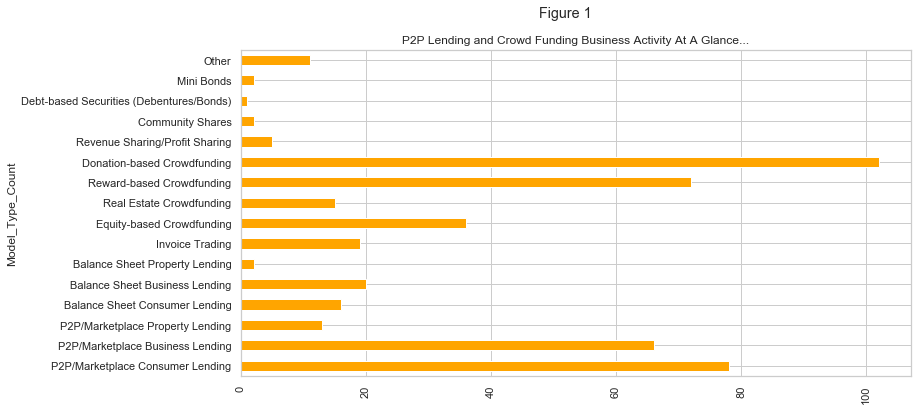

In [18]:

sns.set()
sns.set_style('whitegrid')
COLORS = ['orange']


ax = df_plot.plot.barh(y ='model_type_count', figsize=(12,6), color= COLORS)
ax.set_ylabel('Model_Type_Count')
ax.set_xlabel('')
ax

plt.suptitle('Figure 1')
plt.title('P2P Lending and Crowd Funding Business Activity At A Glance...')
plt.xticks(rotation=90)
plt.show()


## <span style='color :Blue'>Who are the Responders For Donation Based CrowdFunding?</span>


In [123]:
df_plot_update = df_model_frame.groupby([ 'Donation-based Crowdfunding', 'ResponseID']).agg({'ResponseID' : 'count'})
filtered = df_plot_update[150 :] 
filtered
#df_plot_update

#df_plot_update.filter(lambda x: x['Donation-based Crowdfunding'] == 1)



#'ResponseID',

#.agg({'Donation-based Crowdfunding' : 'count'})

ResponseID
Donation-based Crowdfunding ResponseID                   
0                           R_eFLpsdEZ7eZUbnj           1
                            R_ernDtxjrGzx9mM1           1
                            R_eu5Hcf1ZXLXTpaV           1
                            R_oXGFHjFq1Z4rd8R           4
                            R_p4RdFgHaCf812hz           4
                            R_pt9GvIpSn1cJE3f           1
                            R_s6DLzwKd98CuoMN           1
                            R_sYe2XulsneGFuPT           1
                            R_so5ryVwFqRFnXC9           1
                            R_u8H4dzbljkounvP           1
                            R_ufgTnKzQINsc8gx           1
                            R_uzk19VLpNWjXXj3           3
                            R_vAKHoBAF7njzf6V           3
                            R_vjAA6d6Pyy5Bpxn           1
                            R_vqyDjbAAHIo3oqd           4
                            R_x9LdvgxeCAaf8gV           1
                            R_yyAtBOAqUsftPkR           3
1                           R_1DYV7JGwrSpLH2I           7
                            R_1Ka2CkZbGZZSPF9           1
                            R_1Qcp3Kw1L38Wa6A          17
                            R_1f1wsdJBfHIGVJ4           1
                            R_1ilpLpMceqdcFq6           1
                            R_1iqfuXOtS4y8GBf           1
                            R_1mFtnyn58rJKs7h           1
                            R_1qh250xUNdPwfXz           1
                            R_1rkVNIIYyBgLMMZ           1
                            R_20MyidQP69eq2lk          31
                            R_25NJwRGoLsvAwU6           1
                            R_2DMIGpgTI1t3aVw           1
                            R_2Vx9C0cKUzAr2ld          17
                            R_2amecrbg3DVopRM           2
                            R_2aqWMMuWQNFtqSL           2
                            R_2yrT8lTqXMRD5hw           1
                            R_31ab4nSaiDcSLhk           1
                            R_3HhOZ4OEptT9xAy           1
                            R_3KHp3VqMGpzT06k           1
                            R_3KPLbI6XMREPMXm           1
                            R_3KxYnc3CqleBG7j           1
                            R_3MSErHoIFws2RwT           1
                            R_3Mz2nWFUAVmvmW7           1
                            R_3PtMwYtEkHiESDL           1
                            R_3R4uusCsjAcybQZ           1
                            R_3kyPXQOiSjIPBKq           1
                            R_9ugtCYol6UDqjD3           1
                            R_UQJ8l6JMGyqTLDb           1
                            R_eFDZFH3M3khTA9b           1
                            R_qKR6FIw6cvbDEd3           3

## <span style='color :Blue'>Plot the distribution...</span>


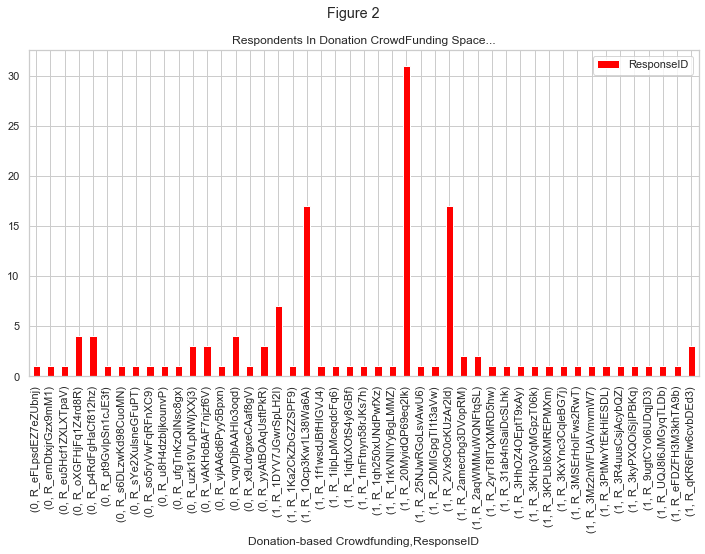

In [161]:
filtered.plot(kind='bar', stacked=True, figsize=[12,6], colormap='autumn')

plt.suptitle('Figure 2')
plt.title('Respondents In Donation CrowdFunding Space...')
plt.xticks(rotation=90)
plt.show()

    

## <span style='color :Blue'>Some explanation around the observations:</span>

<ol>
<li>From a basic count function, it appears Donation Based CrowdFunding and P2P Consumer Lending is the most active.</li><br>
<li>RespondentID : (as seen from height of barchart  : R_20MyidQP69eq2lk...hq is in US!)</li><br>
    
<li>
How does it measure up against absolute and % vol contribution overall to APAC's growth? This will be the next focus...but first the data preparation.</li>
<br>

</ol>



##  <span style='color :Blue'>Who are the Responders For P2P Consumer Lending?</span>


In [131]:
df_plot_update = df_model_frame.groupby([ 'P2P/Marketplace Consumer Lending', 'ResponseID']).agg({'ResponseID' : 'count'})
filtered2 = df_plot_update[150 :] 
filtered2
#df_plot_update

#df_plot_update.filter(lambda x: x['Donation-based Crowdfunding'] == 1)


ResponseID
P2P/Marketplace Consumer Lending ResponseID                   
1                                R_1PXZFPmc9odRVN0           1
                                 R_1hSCnBetwteFWQS           1
                                 R_1jIclR5KSE682i1           1
                                 R_1nZW83Aje4bGf9D           2
                                 R_1ovGMCNjDrCFnIC           1
                                 R_1pm8DtCTgYwGszW           1
                                 R_21H5fzyZW472wQq           1
                                 R_22RL5R2PYCHeLN8           1
                                 R_24NxNpc1ClhwvYW           1
                                 R_2D5oo6NkTS2XhBZ           2
                                 R_2SetrrUL1BMblEs           1
                                 R_2VaT37MSXhgLYy8           1
                                 R_2X0cKVkP1FqMEkw           1
                                 R_2YL2UtCWyLQfVJ1           1
                                 R_2c191Pt36vUVeVj           1
                                 R_2z5s0cDoYMGHdbS           1
                                 R_3329syouSaUXy3x           1
                                 R_3Dj5dqpzKiVvOg1           1
                                 R_3EKZmDKVFZPLBMy           1
                                 R_3JeIfZivNdp9Q4Q           1
                                 R_3NXkZvJ4t8gbxpE           1
                                 R_3PiuUDcOZwHkECa           1
                                 R_3PtQAj0KebB0c6z           1
                                 R_3dM9LgHJJ1YVRxj           1
                                 R_3dW9z4JxpI0Srso           1
                                 R_3gZwStdgA1Njman           1
                                 R_3nwvEdVizQ8IVsP           1
                                 R_3oNsAaph6Bk2SHL           1
                                 R_3qItkh8JTkrlpea           1
                                 R_41KQwk7Fgpu12BH           1
                                 R_55RGs4AdvkHJw3v           1
                                 R_8e5BUgPkMHC5tcJ           1
                                 R_8hW8Kk8WHDp8CeR           1
                                 R_C9zUAHOGVidmNuV           1
                                 R_OqASZxuJUVcHH3P           1
                                 R_R8KNOn6ckxCyGqZ           1
                                 R_U9K1NJUCzzA8dwd           1
                                 R_UabiDrTUPiN3dbb           1
                                 R_Us96bqGH7jtdL9L           2
                                 R_XGRX7NFcKEwvTwZ           1
                                 R_cC3TRlq36k6NSpz           1
                                 R_ernDtxjrGzx9mM1           1
                                 R_eu5Hcf1ZXLXTpaV           1
                                 R_s6DLzwKd98CuoMN           1
                                 R_u8H4dzbljkounvP           1
                                 R_vAKHoBAF7njzf6V           3
                                 R_x9LdvgxeCAaf8gV           1

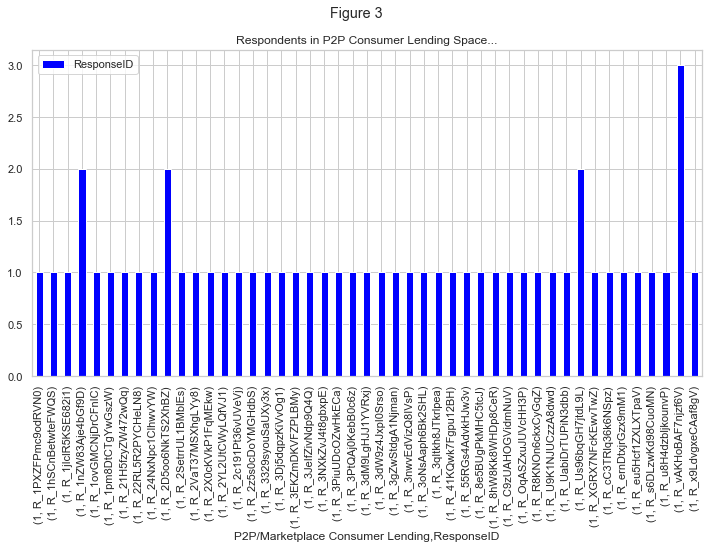

In [133]:
filtered2.plot(kind='bar', stacked=True, figsize=[12,6], colormap='winter')

plt.suptitle('Figure 3')
plt.title('Respondents in P2P Consumer Lending Space...')
plt.xticks(rotation=90)
plt.show()


## <span style='color :Blue'>Some explanation around the observations:</span>

<ol>
<li>RespondentID : (as seen from height of barchart  : R_vAKHoBAF7njzf6V has the highest occurence...hq is in Spore)</li><br>
    
<li>
Overall the distribution is generally even compared to Donation. Yet to investigate : does an active footprint mean more vol contribution to overall p2p lending?</li>
<br>

</ol>


## <span style='color :Blue'>Preparing data frame (for merging) on all model type grouped by common key : ResponseID</span>


In [125]:
df = df_model_frame.groupby(['ResponseID']).sum()


In [126]:
df

,P2P/Marketplace Consumer Lending,P2P/Marketplace Business Lending,P2P/Marketplace Property Lending,Balance Sheet Consumer Lending,Balance Sheet Business Lending,Balance Sheet Property Lending,Invoice Trading,Equity-based Crowdfunding,Real Estate Crowdfunding,Reward-based Crowdfunding,Donation-based Crowdfunding,Revenue Sharing/Profit Sharing,Community Shares,Debt-based Securities (Debentures/Bonds),Mini Bonds,Other
ResponseID,,,,,,,,,,,,,,,,
R_09113143AS25,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0
R_0911314OPQW3,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0
R_098Rbq07I2341,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0
R_098Rbq07IBZwuxX,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
R_0Cb9xqHm8pH5dbr,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_vAKHoBAF7njzf6V,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
R_vjAA6d6Pyy5Bpxn,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
R_vqyDjbAAHIo3oqd,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## <span style='color :Blue'>1.2 : Data Frame for volume related data (all numerical)</span>


In [135]:
df_statistics = new_df.iloc[:, np.r_[0,23:39]].copy()

In [136]:
#for checking
#df_statistics.head()

In [137]:

# for plotting purposes
df_vol_frame_plot = pd.concat([df_statistics.P2PC_VOL_USD, df_statistics.P2PB_VOL_USD, df_statistics.P2PP_VOL_USD, df_statistics.Bal_Sheet_Consumer_Lending_VOL_USD, df_statistics.Bal_Sheet_Business_Lending_VOL_USD, df_statistics.Bal_Sheet_Property_Lending_VOL_USD, df_statistics.Invoice_Trading_VOL_USD, df_statistics.Equity_Crowd_Funding_VOL_USD, df_statistics.Real_Estate_Crowd_Funding_VOL_USD, df_statistics.Reward_Based_CrowdFunding_VOL_USD, df_statistics.Donation_Based_CrowdFunding_VOL_USD, df_statistics.Revenue_Sharing_VOL_USD, df_statistics.Community_Sharing_VOL_USD, df_statistics.Debt_Based_Securities_VOL_USD, df_statistics.Mini_Bonds_VOL_USD, df_statistics.Others_VOL_USD], axis=1)



In [138]:
df2_plot = df_vol_frame_plot.sum()
df2_plot

P2PC_VOL_USD                           9.820734e+08
P2PB_VOL_USD                           1.772638e+09
P2PP_VOL_USD                           6.588957e+08
Bal_Sheet_Consumer_Lending_VOL_USD     8.834290e+08
Bal_Sheet_Business_Lending_VOL_USD     9.177053e+08
Bal_Sheet_Property_Lending_VOL_USD     1.867600e+07
Invoice_Trading_VOL_USD                9.401419e+07
Equity_Crowd_Funding_VOL_USD           1.620674e+08
Real_Estate_Crowd_Funding_VOL_USD      2.581257e+08
Reward_Based_CrowdFunding_VOL_USD      2.015064e+08
Donation_Based_CrowdFunding_VOL_USD    7.580204e+07
Revenue_Sharing_VOL_USD                9.881507e+06
Community_Sharing_VOL_USD              7.476180e+07
Debt_Based_Securities_VOL_USD          2.965372e+06
Mini_Bonds_VOL_USD                     1.066513e+07
Others_VOL_USD                         5.000000e+07
dtype: float64

In [139]:
vol_by_perct = (df2_plot *100 / df2_plot.sum())

vol_by_perct

P2PC_VOL_USD                           15.908642
P2PB_VOL_USD                           28.715029
P2PP_VOL_USD                           10.673475
Bal_Sheet_Consumer_Lending_VOL_USD     14.310697
Bal_Sheet_Business_Lending_VOL_USD     14.865940
Bal_Sheet_Property_Lending_VOL_USD      0.302533
Invoice_Trading_VOL_USD                 1.522939
Equity_Crowd_Funding_VOL_USD            2.625336
Real_Estate_Crowd_Funding_VOL_USD       4.181387
Reward_Based_CrowdFunding_VOL_USD       3.264209
Donation_Based_CrowdFunding_VOL_USD     1.227920
Revenue_Sharing_VOL_USD                 0.160071
Community_Sharing_VOL_USD               1.211069
Debt_Based_Securities_VOL_USD           0.048036
Mini_Bonds_VOL_USD                      0.172765
Others_VOL_USD                          0.809952
dtype: float64

In [140]:
vol_contr_by_perct = pd.concat([df2_plot, vol_by_perct], axis=1)

vol_contr_by_perct


,0,1
P2PC_VOL_USD,9.820734e+08,15.908642
P2PB_VOL_USD,1.772638e+09,28.715029
P2PP_VOL_USD,6.588957e+08,10.673475
Bal_Sheet_Consumer_Lending_VOL_USD,8.834290e+08,14.310697
Bal_Sheet_Business_Lending_VOL_USD,9.177053e+08,14.865940
Bal_Sheet_Property_Lending_VOL_USD,1.867600e+07,0.302533
Invoice_Trading_VOL_USD,9.401419e+07,1.522939
Equity_Crowd_Funding_VOL_USD,1.620674e+08,2.625336
Real_Estate_Crowd_Funding_VOL_USD,2.581257e+08,4.181387
Reward_Based_CrowdFunding_VOL_USD,2.015064e+08,3.264209


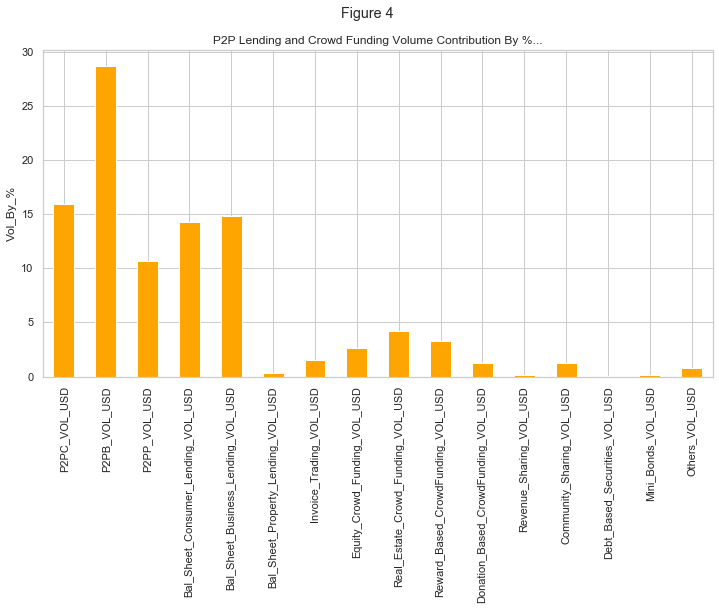

In [141]:
sns.set()
sns.set_style('whitegrid')
COLORS = ['orange']


ax = vol_by_perct.plot.bar(y ='Vol_By_%', figsize=(12,6), color= COLORS)
ax.set_ylabel('Vol_By_%')
ax.set_xlabel('')
ax

plt.suptitle('Figure 4')
plt.title('P2P Lending and Crowd Funding Volume Contribution By %...')
plt.xticks(rotation=90)
plt.show()


## <span style='color :Blue'>Some explanation around the observations:</span>

<ol>
<li>Donation Based CrowdFunding clearly only contributes to slightly over 1% relatively while it the most active business in absolute terms.</li><br>
<li>
This indicates it may not be as profitable as the activity indicates.</li>
<br>
<li>Interestingly, it is P2P Business Lending that accounts for than ~50% of total volume contribution while P2P Consumer Lending is the most active lending model type in absolute terms.</li>
    <br>
<li>
This indicates there is a lot of room to grow Business Lending as alternative finance and rightfully so as it demonstrates financial inclusion and is encouraged with adequate regulatory framework.</li>


</ol>


In [142]:
df_vol_frame = pd.concat([df_statistics.ResponseID, df_statistics.P2PC_VOL_USD, df_statistics.P2PB_VOL_USD, df_statistics.P2PP_VOL_USD, df_statistics.Bal_Sheet_Consumer_Lending_VOL_USD, df_statistics.Bal_Sheet_Business_Lending_VOL_USD, df_statistics.Bal_Sheet_Property_Lending_VOL_USD, df_statistics.Invoice_Trading_VOL_USD, df_statistics.Equity_Crowd_Funding_VOL_USD, df_statistics.Real_Estate_Crowd_Funding_VOL_USD, df_statistics.Reward_Based_CrowdFunding_VOL_USD, df_statistics.Donation_Based_CrowdFunding_VOL_USD, df_statistics.Revenue_Sharing_VOL_USD, df_statistics.Community_Sharing_VOL_USD, df_statistics.Debt_Based_Securities_VOL_USD, df_statistics.Mini_Bonds_VOL_USD, df_statistics.Others_VOL_USD], axis=1)


In [143]:
# df_vol_frame -- lists out all 368 records ungrouped

In [144]:
df2 = df_vol_frame.groupby(['ResponseID']).sum()

df2

,P2PC_VOL_USD,P2PB_VOL_USD,P2PP_VOL_USD,Bal_Sheet_Consumer_Lending_VOL_USD,Bal_Sheet_Business_Lending_VOL_USD,Bal_Sheet_Property_Lending_VOL_USD,Invoice_Trading_VOL_USD,Equity_Crowd_Funding_VOL_USD,Real_Estate_Crowd_Funding_VOL_USD,Reward_Based_CrowdFunding_VOL_USD,Donation_Based_CrowdFunding_VOL_USD,Revenue_Sharing_VOL_USD,Community_Sharing_VOL_USD,Debt_Based_Securities_VOL_USD,Mini_Bonds_VOL_USD,Others_VOL_USD
ResponseID,,,,,,,,,,,,,,,,
R_09113143AS25,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0,0.0,86237965.72,0.0,0.000000e+00,0.0,0.0,0,0,0.0,0
R_0911314OPQW3,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0,0.0,0.00,0.0,2.542595e+07,0.0,0.0,0,0,0.0,0
R_098Rbq07I2341,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0,0.0,0.00,0.0,1.163675e+06,0.0,0.0,0,0,0.0,0
R_098Rbq07IBZwuxX,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0,11000000.0,0.00,0.0,0.000000e+00,0.0,0.0,0,0,0.0,0
R_0Cb9xqHm8pH5dbr,8.710514e+05,0.000000e+00,0.0,0.0,0.0,0,0.0,0.00,0.0,0.000000e+00,0.0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_vAKHoBAF7njzf6V,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0,0.0,0.00,0.0,0.000000e+00,0.0,0.0,0,0,0.0,0
R_vjAA6d6Pyy5Bpxn,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0,0.0,0.00,0.0,7.331100e+04,0.0,0.0,0,0,0.0,0
R_vqyDjbAAHIo3oqd,0.000000e+00,4.372147e+07,0.0,0.0,0.0,0,0.0,0.00,0.0,0.000000e+00,0.0,0.0,0,0,0.0,0


## <span style='color :Blue'>1.3 : Combine model type and volume data frames based on join key : ResponseID</span>


In [145]:
df_model_vol_frame = pd.merge(df, df2, left_on = 'ResponseID', right_on = 'ResponseID', how = 'left')

In [146]:
df_model_vol_frame

,P2P/Marketplace Consumer Lending,P2P/Marketplace Business Lending,P2P/Marketplace Property Lending,Balance Sheet Consumer Lending,Balance Sheet Business Lending,Balance Sheet Property Lending,Invoice Trading,Equity-based Crowdfunding,Real Estate Crowdfunding,Reward-based Crowdfunding,...,Invoice_Trading_VOL_USD,Equity_Crowd_Funding_VOL_USD,Real_Estate_Crowd_Funding_VOL_USD,Reward_Based_CrowdFunding_VOL_USD,Donation_Based_CrowdFunding_VOL_USD,Revenue_Sharing_VOL_USD,Community_Sharing_VOL_USD,Debt_Based_Securities_VOL_USD,Mini_Bonds_VOL_USD,Others_VOL_USD
ResponseID,,,,,,,,,,,,,,,,,,,,,
R_09113143AS25,0,0,0,0,0,0,0,13,0,0,...,0.0,86237965.72,0.0,0.000000e+00,0.0,0.0,0,0,0.0,0
R_0911314OPQW3,0,0,0,0,0,0,0,0,0,20,...,0.0,0.00,0.0,2.542595e+07,0.0,0.0,0,0,0.0,0
R_098Rbq07I2341,0,0,0,0,0,0,0,0,0,16,...,0.0,0.00,0.0,1.163675e+06,0.0,0.0,0,0,0.0,0
R_098Rbq07IBZwuxX,0,0,0,0,0,0,1,0,0,0,...,11000000.0,0.00,0.0,0.000000e+00,0.0,0.0,0,0,0.0,0
R_0Cb9xqHm8pH5dbr,1,0,0,1,0,0,0,0,0,0,...,0.0,0.00,0.0,0.000000e+00,0.0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_vAKHoBAF7njzf6V,3,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.000000e+00,0.0,0.0,0,0,0.0,0
R_vjAA6d6Pyy5Bpxn,0,0,0,0,0,0,0,0,0,1,...,0.0,0.00,0.0,7.331100e+04,0.0,0.0,0,0,0.0,0
R_vqyDjbAAHIo3oqd,0,4,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.000000e+00,0.0,0.0,0,0,0.0,0


In [147]:
#check col names
#for col in df_model_vol_frame:
   # print(col)

In [148]:
#Since vol contribution of P2P Business Lending is the highest, let me find out who are the contributing respondents and where they originate

## <span style='color :Blue'>1.4 : Zooming into P2P Business Lending, this step aims to find out who are the contributing respondents and where do they originate from : </span>


In [149]:
responses_P2PBL = df_model_vol_frame[df_model_vol_frame['P2P/Marketplace Business Lending'] > 0]

In [150]:
responses_P2PBL

,P2P/Marketplace Consumer Lending,P2P/Marketplace Business Lending,P2P/Marketplace Property Lending,Balance Sheet Consumer Lending,Balance Sheet Business Lending,Balance Sheet Property Lending,Invoice Trading,Equity-based Crowdfunding,Real Estate Crowdfunding,Reward-based Crowdfunding,...,Invoice_Trading_VOL_USD,Equity_Crowd_Funding_VOL_USD,Real_Estate_Crowd_Funding_VOL_USD,Reward_Based_CrowdFunding_VOL_USD,Donation_Based_CrowdFunding_VOL_USD,Revenue_Sharing_VOL_USD,Community_Sharing_VOL_USD,Debt_Based_Securities_VOL_USD,Mini_Bonds_VOL_USD,Others_VOL_USD
ResponseID,,,,,,,,,,,,,,,,,,,,,
R_0PPfRy4g9KQx46B,0,1,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0000,0.0,0,0,0.0,0
R_11hhfpiWGvotoeu,0,1,0,0,0,0,1,0,0,0,...,495730.00,0.0,0.0,0.0,0.0000,0.0,0,0,0.0,0
R_12m1MQYjsTAooJM,0,1,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0000,0.0,0,0,0.0,0
R_1C45ZzRKnAD5ard,1,1,0,0,0,0,0,0,1,0,...,0.00,0.0,15343920.0,0.0,0.0000,0.0,0,0,0.0,0
R_1CJWfaQmyUDjNQ3,1,1,1,1,1,1,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0000,0.0,0,0,0.0,0
R_1CwnOyMAglQ5kMl,0,1,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0000,0.0,0,0,0.0,0
R_1OqVw27lMMK4gUX,0,1,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0000,0.0,0,0,0.0,0
R_1QiODUL7I45RHnv,0,1,0,0,1,0,1,0,0,0,...,0.00,0.0,0.0,0.0,0.0000,0.0,0,0,0.0,0
R_1Qlrp4Ndiy3jDO6,0,1,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0000,0.0,0,0,0.0,0


## <span style='color :Blue'>1.5 : Data Frame for region and country related data so i can combine with the responses_P2PBL and find out which country do they originate from : </span>


In [151]:
df_ctry = new_df.iloc[:, [0,18,19,20,21,22]].copy()

In [152]:
df_ctry

,ResponseID,HEADQUARTERS,OPERATING_CTRY,REGION_CCAF_DEFINED,REGION_WB_DEFINED,SUB_REGION
0,R_qKR6FIw6cvbDEd3,Netherlands,Indonesia,APAC,East Asia & Pacific,South-East Asia
1,R_qKR6FIw6cvbDEd3,Netherlands,Nepal,APAC,South Asia,South and Central Asia
2,R_qKR6FIw6cvbDEd3,Netherlands,Sri Lanka,APAC,South Asia,South and Central Asia
3,R_1rkVNIIYyBgLMMZ,Malaysia,Malaysia,APAC,East Asia & Pacific,South-East Asia
4,R_1QiODUL7I45RHnv,India,India,APAC,South Asia,South and Central Asia
...,...,...,...,...,...,...
363,R_2PAST3Z5vPJRMOB,South Korea,South Korea,APAC,East Asia & Pacific,East Asia
364,R_1C45ZzRKnAD5ard,South Korea,South Korea,APAC,East Asia & Pacific,East Asia
365,R_3dY3WDgPm97qx3P,Taiwan,Taiwan,APAC,East Asia & Pacific,East Asia
366,R_3JeIfZivNdp9Q4Q,Taiwan,Taiwan,APAC,East Asia & Pacific,East Asia


## <span style='color :Blue'>1.6 : Join the data frames on responseID key</span>


In [153]:
df_model_vol_ctry_frame = pd.merge(responses_P2PBL, df_ctry, left_on = 'ResponseID', right_on = 'ResponseID', how = 'left')

In [154]:
df_model_vol_ctry_frame

,ResponseID,P2P/Marketplace Consumer Lending,P2P/Marketplace Business Lending,P2P/Marketplace Property Lending,Balance Sheet Consumer Lending,Balance Sheet Business Lending,Balance Sheet Property Lending,Invoice Trading,Equity-based Crowdfunding,Real Estate Crowdfunding,...,Revenue_Sharing_VOL_USD,Community_Sharing_VOL_USD,Debt_Based_Securities_VOL_USD,Mini_Bonds_VOL_USD,Others_VOL_USD,HEADQUARTERS,OPERATING_CTRY,REGION_CCAF_DEFINED,REGION_WB_DEFINED,SUB_REGION
0,R_0PPfRy4g9KQx46B,0,1,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,Indonesia,Indonesia,APAC,East Asia & Pacific,South-East Asia
1,R_11hhfpiWGvotoeu,0,1,0,0,0,0,1,0,0,...,0.0,0,0,0.0,0,Singapore,Malaysia,APAC,East Asia & Pacific,South-East Asia
2,R_12m1MQYjsTAooJM,0,1,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,"Auckland, New Zealand",New Zealand,APAC,East Asia & Pacific,Oceania
3,R_1C45ZzRKnAD5ard,1,1,0,0,0,0,0,0,1,...,0.0,0,0,0.0,0,South Korea,South Korea,APAC,East Asia & Pacific,East Asia
4,R_1CJWfaQmyUDjNQ3,1,1,1,1,1,1,0,0,0,...,0.0,0,0,0.0,0,United States,Hong Kong,APAC,East Asia & Pacific,East Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,R_vqyDjbAAHIo3oqd,0,4,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,SIngapore,Singapore,APAC,East Asia & Pacific,South-East Asia
62,R_vqyDjbAAHIo3oqd,0,4,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,SIngapore,Taiwan,APAC,East Asia & Pacific,East Asia
63,R_yyAtBOAqUsftPkR,0,3,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,Singapore,Indonesia,APAC,East Asia & Pacific,South-East Asia
64,R_yyAtBOAqUsftPkR,0,3,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,Singapore,Malaysia,APAC,East Asia & Pacific,South-East Asia


In [155]:
responses_p2pbl_info = df_model_vol_ctry_frame.iloc[:, np.r_[0, 34]].copy()

In [156]:
responses_p2pbl_info

,ResponseID,OPERATING_CTRY
0,R_0PPfRy4g9KQx46B,Indonesia
1,R_11hhfpiWGvotoeu,Malaysia
2,R_12m1MQYjsTAooJM,New Zealand
3,R_1C45ZzRKnAD5ard,South Korea
4,R_1CJWfaQmyUDjNQ3,Hong Kong
...,...,...
61,R_vqyDjbAAHIo3oqd,Singapore
62,R_vqyDjbAAHIo3oqd,Taiwan
63,R_yyAtBOAqUsftPkR,Indonesia
64,R_yyAtBOAqUsftPkR,Malaysia


In [157]:
responses_ctry_originated = responses_p2pbl_info.groupby(['OPERATING_CTRY']).count()

In [158]:
responses_ctry_originated

,ResponseID
OPERATING_CTRY,
Australia,4
Cambodia,3
Hong Kong,1
India,7
Indonesia,12
Japan,4
Kazakhstan,1
Malaysia,5
Mongolia,1


## <span style='color :Blue'>Some explanation around the observations:</span>

<ol>
<li>P2P Business Lending resondents largely come from Indonesia and Singapore and this matches with the fact that regulations are adequately enforced, lowering barriers to entry and encouraging business innovation around this space.</li><br>


</ol>
